## mpg Analysis
This notebook analyzes the dataset Auto from ISLR package. This project focuses on the relationship between mpg and other factors, also the prediction for mpg.

In [22]:
#load library
library(tidyverse)
library(MASS)
library(ISLR)
library(ggplot2)
library(FNN)

In [2]:
# overview the Auto dataset
head(Auto)
sapply(Auto, class)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


mpg    cylinders displacement   horsepower       weight acceleration 
   "numeric"    "numeric"    "numeric"    "numeric"    "numeric"    "numeric" 
        year       origin         name 
   "numeric"    "numeric"     "factor"

#### columns information
mpg: miles per gallon \
cylinders: Number of cylinders between 4 and 8 \
displacement: Engine displacement (cu. inches) \
horsepower: Engine horsepower \
weight: Vehicle weight (lbs.) \
acceleration: Time to accelerate from 0 to 60 mph (sec.) \
year: Model year (modulo 100) \
origin: Origin of car (1. American, 2. European, 3. Japanese) \
name: Vehicle name

In [3]:
# create a new column to category mpg, 
# defining that if mpg>25, mpg01 = 1, if mpg<=25, mpg01 = 0.
df = Auto %>% mutate(mpg01 = case_when(
              mpg>25 ~ 1,
              mpg<=25 ~ 0))
df%>% head
df$mpg01 = as.factor(df$mpg01)
df$origin = as.factor(df$origin)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


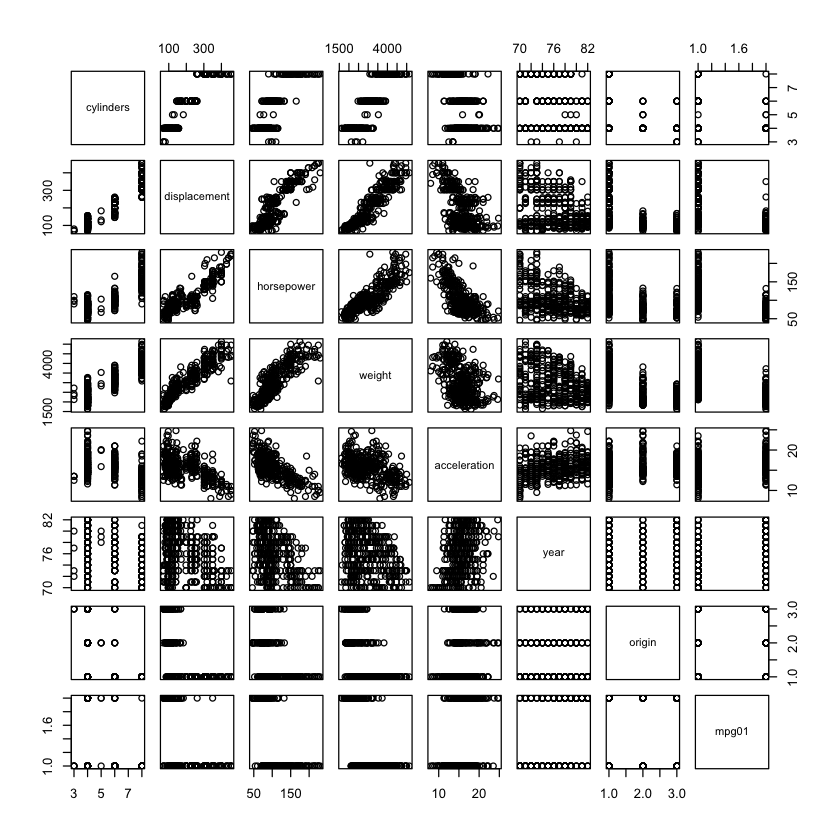

In [6]:
#overview the data
pairs(df[,-c(1,9)])

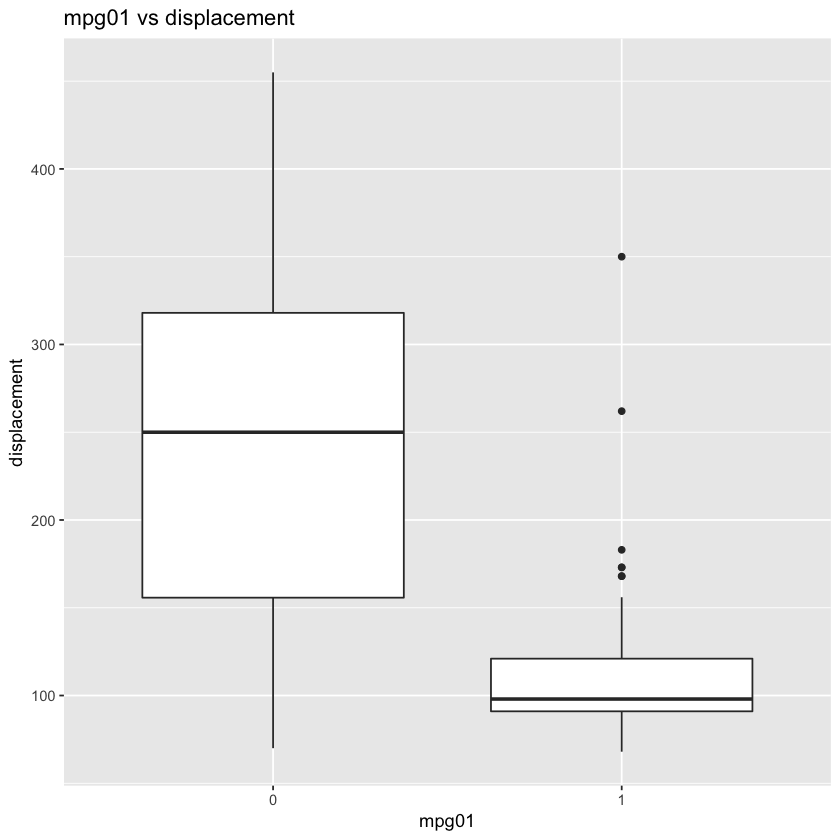

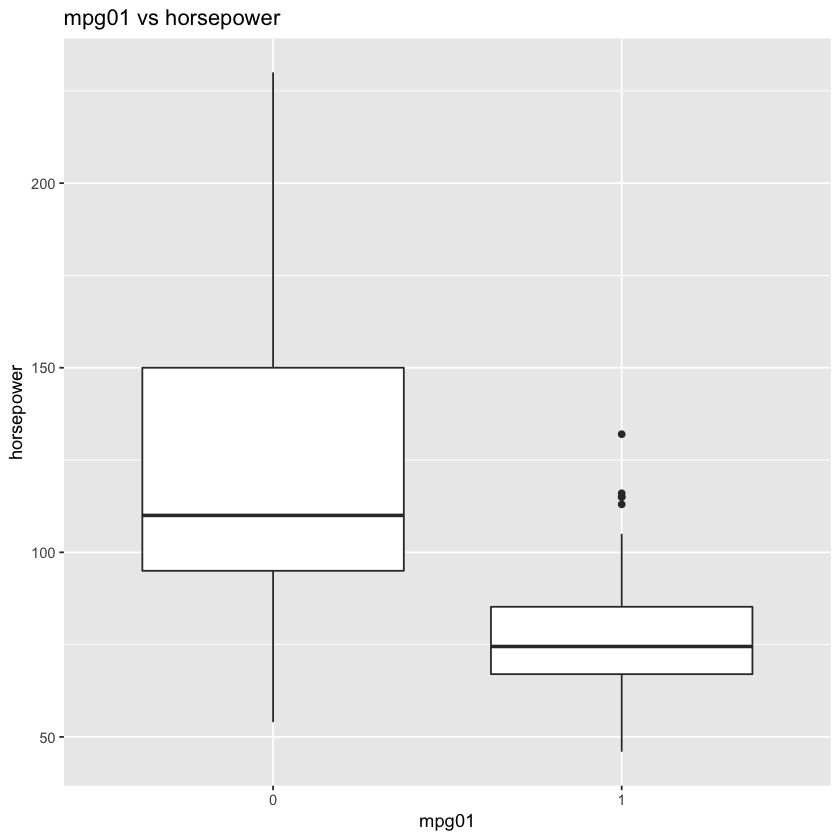

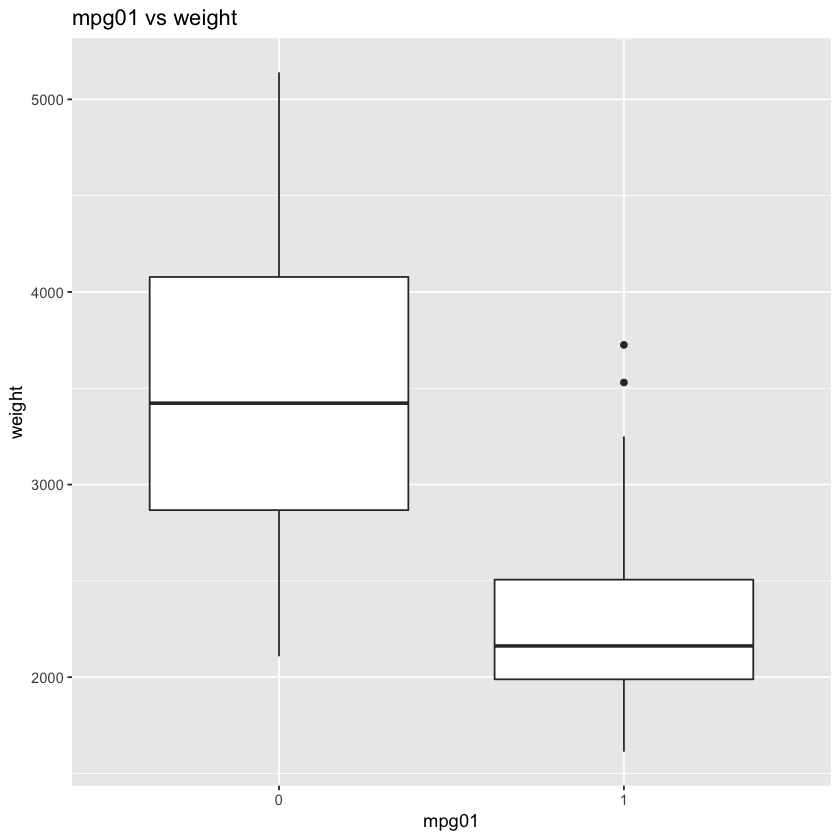

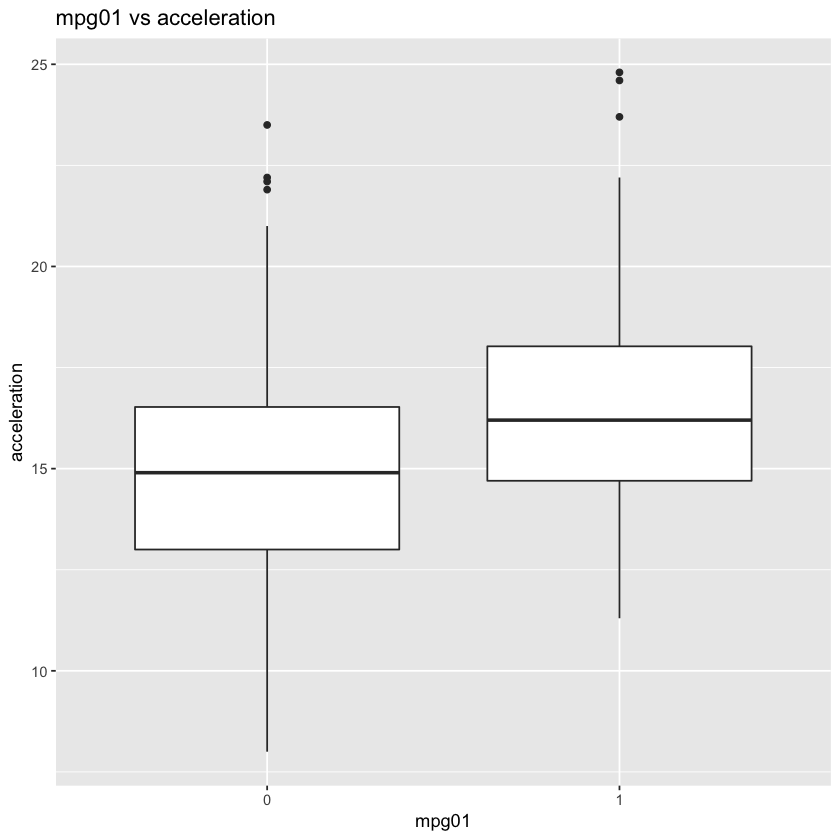

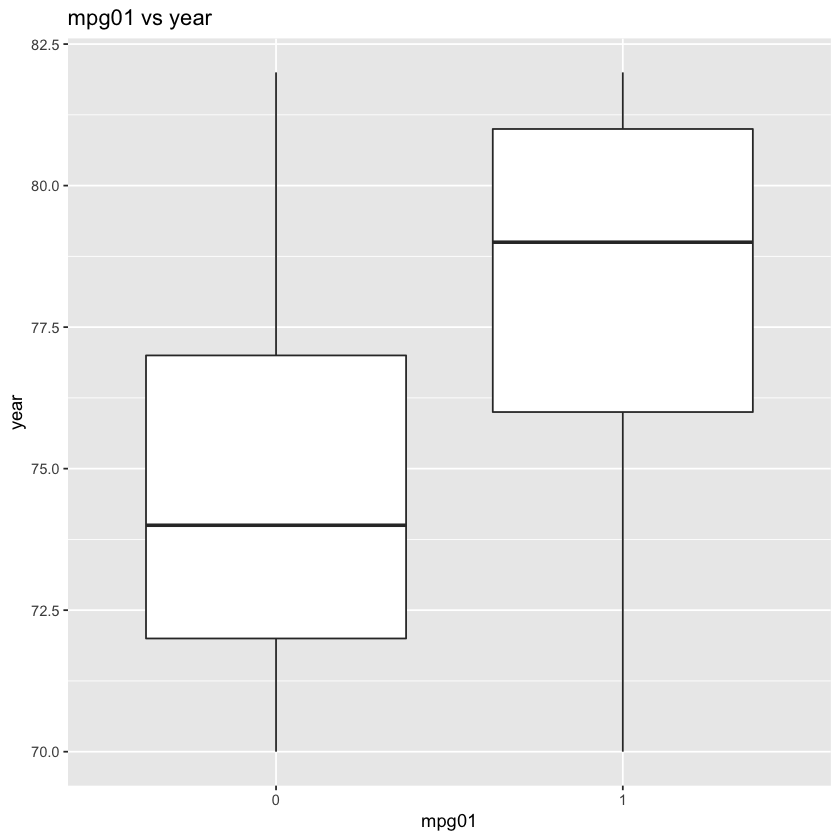

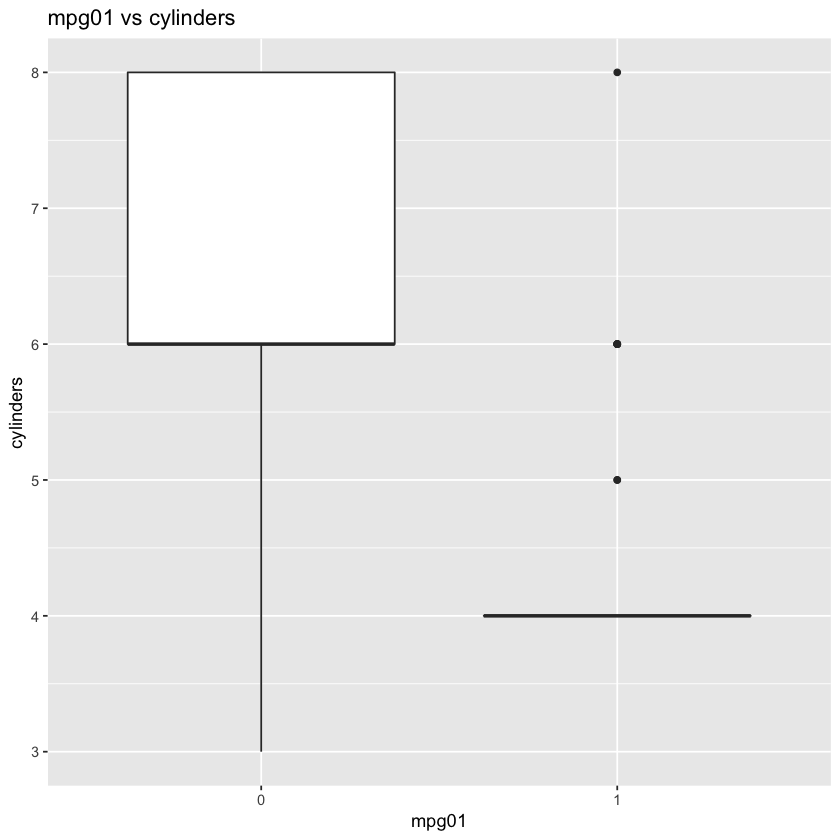

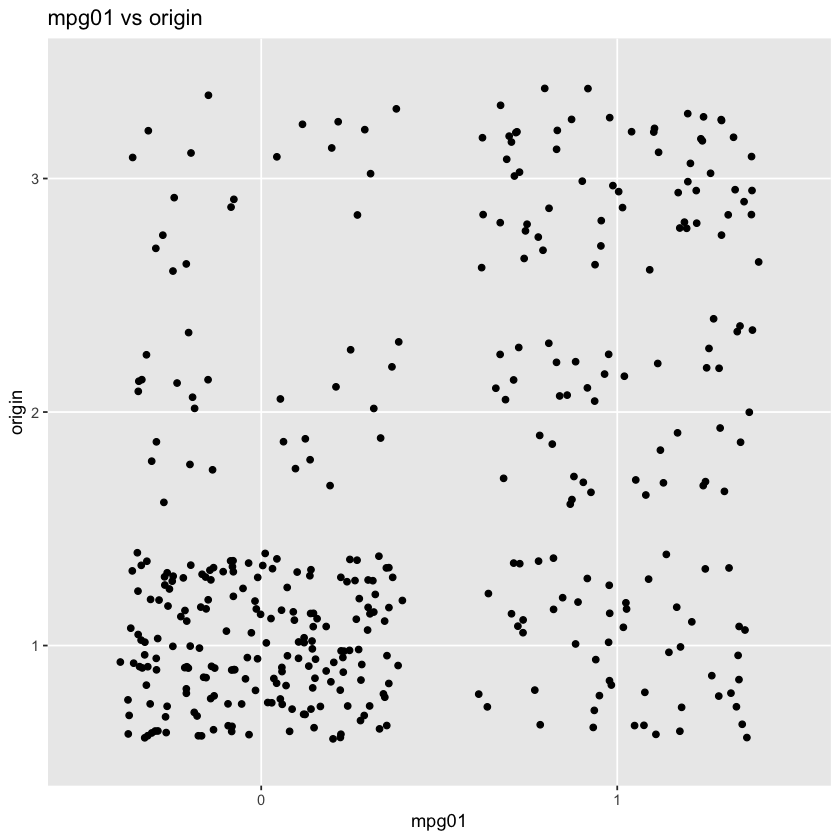

In [8]:
# view the relationship between mpg01 and other factors
ggplot(df, aes(x = mpg01, y=displacement)) + geom_boxplot() + ggtitle("mpg01 vs displacement")
ggplot(df, aes(x = mpg01, y=horsepower)) + geom_boxplot() + ggtitle("mpg01 vs horsepower")
ggplot(df, aes(x = mpg01, y=weight)) + geom_boxplot() + ggtitle("mpg01 vs weight")
ggplot(df, aes(x = mpg01, y=acceleration)) + geom_boxplot()+ ggtitle("mpg01 vs acceleration")
ggplot(df, aes(x = mpg01, y=year)) + geom_boxplot()+ ggtitle("mpg01 vs year")
ggplot(df, aes(x = mpg01, y=cylinders)) + geom_boxplot() + ggtitle("mpg01 vs cylinders")
ggplot(df, aes(x = mpg01, y=origin)) + geom_jitter() +ggtitle("mpg01 vs origin")

From pairs plot, there are high correlations between some variables, like displacement, horsepower and weight. To find which features more likely to be useful in predicting mpg01, we need to see if there is a big difference between one feature under mpg01=1 and the feature under mpg01=0. From the plots made above, I would like to say that displacement, horsepower, weight, cylinders and year may be useful to predict mpg01. In the next part, I would choose displacement, horsepower, weight, and cylinders to be the predictions.

### Prediction

In [9]:
# set training and testing datasets
# here I randomly select 80% of the observations (round down to the nearest integer) 
# from each class to be the training data
set.seed(123)
df_0 = df %>% filter(mpg01 == 0)
df_1 = df %>% filter(mpg01 == 1)
train_size0 = floor(nrow(df_0)*0.8)
train_size1 = floor(nrow(df_1)*0.8)
train_id0 = sample(1:nrow(df_0), train_size0)
train0 = df_0[train_id0,]
test0 = df_0[-train_id0,]
train_id1 = sample(1:nrow(df_1), train_size1)
train1 = df_1[train_id1,]
test1 = df_1[-train_id1,]
train = rbind(train0, train1)
test = rbind(test0,test1)
nrow(train)
nrow(test)

[1] 312

[1] 80

Call:
lda(mpg01 ~ displacement + horsepower + weight + cylinders, data = train)

Prior probabilities of groups:
        0         1 
0.6025641 0.3974359 

Group means:
  displacement horsepower   weight cylinders
0     254.3963  124.93617 3470.750  6.425532
1     108.9597   75.04032 2253.226  4.088710

Coefficients of linear discriminants:
                      LD1
displacement  0.001083425
horsepower   -0.002409385
weight       -0.001075286
cylinders    -0.292718618

[1] 0.2125

[1] 0.1474359

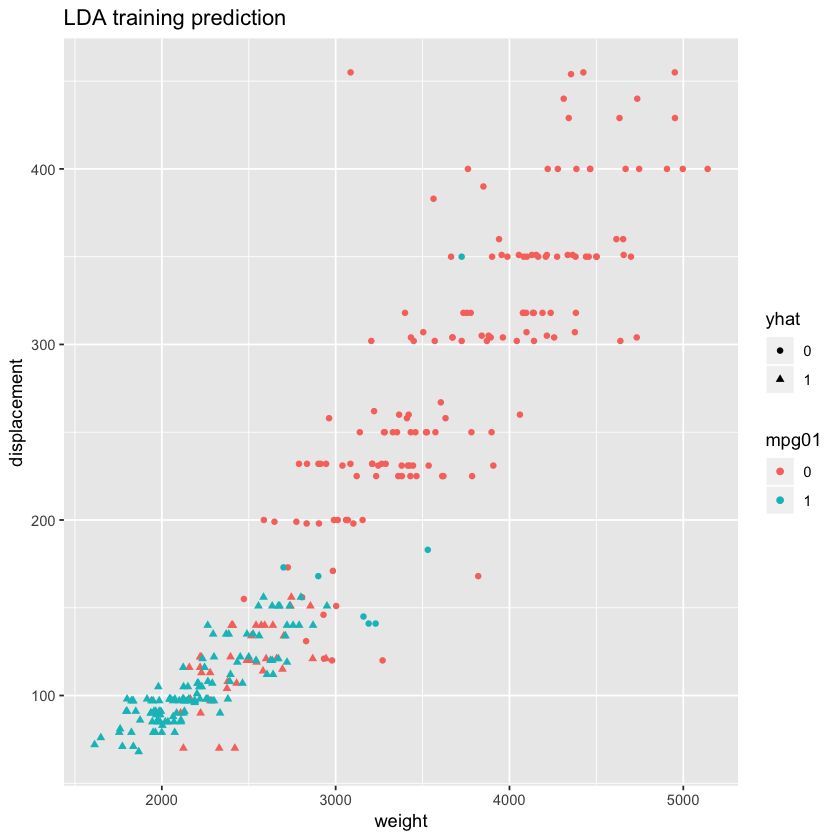

In [17]:
# use LDA do the prediction
Auto_lda = lda(mpg01 ~ displacement + horsepower + weight + cylinders, data = train)
Auto_lda
pred_train = predict(Auto_lda, train)
pred_test = predict(Auto_lda, test)
test_error = mean(pred_test$class != test$mpg01)
test_error
train_error = mean(pred_train$class != train$mpg01)
train_error

train$yhat <- pred_train$class

ggplot(train, 
       aes(x=weight, y=displacement, color = mpg01, shape = yhat)) +
  geom_point(size=1.5) + ggtitle("LDA training prediction")

Call:
qda(mpg01 ~ displacement + horsepower + weight + cylinders, data = train)

Prior probabilities of groups:
        0         1 
0.6025641 0.3974359 

Group means:
  displacement horsepower   weight cylinders
0     254.3963  124.93617 3470.750  6.425532
1     108.9597   75.04032 2253.226  4.088710

[1] 0.175

[1] 0.1378205

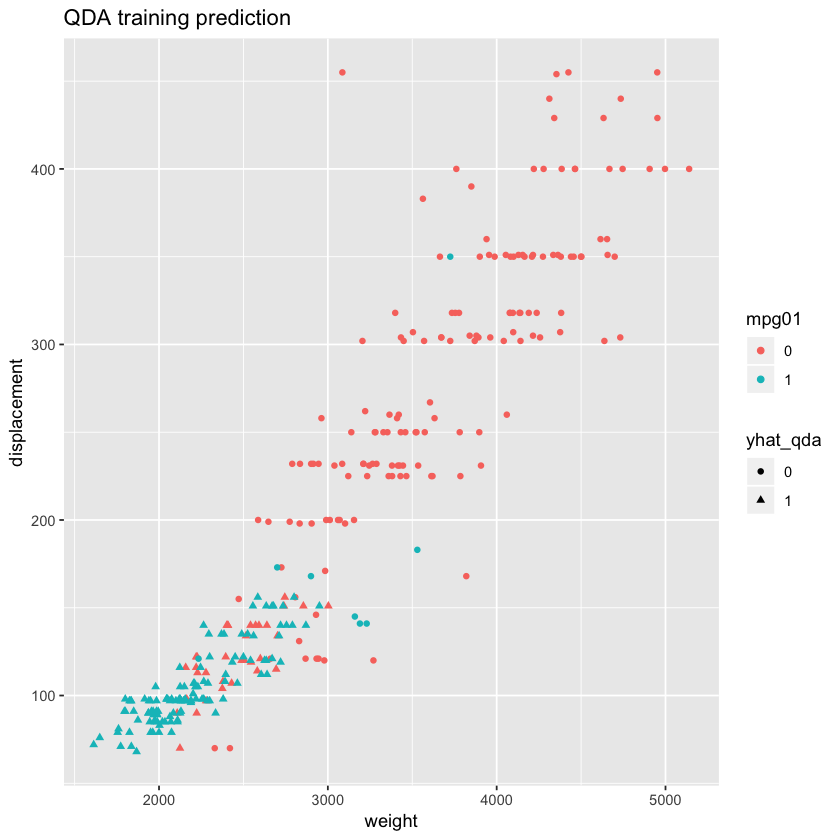

In [18]:
# use QDA do the prediction
Auto_qda = qda(mpg01 ~ displacement + horsepower + weight + cylinders, data = train)
Auto_qda

pred_train_qda = predict(Auto_qda, train)
pred_test_qda = predict(Auto_qda, test)
test_error_qda = mean(pred_test_qda$class != test$mpg01)
test_error_qda
train_error_qda = mean(pred_train_qda$class != train$mpg01)
train_error_qda

train$yhat_qda <- pred_train_qda$class

ggplot(train, 
       aes(x=weight, y=displacement, color = mpg01, shape = yhat_qda)) +
  geom_point(size=1.5) + ggtitle("QDA training prediction")

 From results above, we can see that QDA’s and LDA’s training and testing errors are close to each other, 7
which means their performances are almost equal. So we would like to say the calss-specific coveriances are similiar with each other. 

In [13]:
# use logistic regression to do the prediction
mod_glm = glm(mpg01 ~ cylinders + displacement + horsepower + weight , 
              family = binomial, data=train)
summary(mod_glm)


Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4509  -0.3227  -0.0096   0.4011   3.1862  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  11.4334433  2.1397949   5.343 9.13e-08 ***
cylinders    -0.2384585  0.4551988  -0.524    0.600    
displacement -0.0083310  0.0112652  -0.740    0.460    
horsepower   -0.0746357  0.0178597  -4.179 2.93e-05 ***
weight       -0.0010316  0.0008111  -1.272    0.203    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 419.30  on 311  degrees of freedom
Residual deviance: 184.06  on 307  degrees of freedom
AIC: 194.06

Number of Fisher Scoring iterations: 7


In [14]:
# get training and testing error
pred_train = predict(mod_glm, train)
pred_probs_train = binomial()$linkinv(pred_train)
trainpred = 1 * (pred_probs_train>0.5)
train_error = mean(trainpred != train$mpg01)
train_error
pred_test = predict(mod_glm, test)
pred_probs_test = binomial()$linkinv(pred_test)
testpred = 1 * (pred_probs_test>0.5)
test_error = mean(testpred != test$mpg01)
test_error

[1] 0.1410256

[1] 0.15

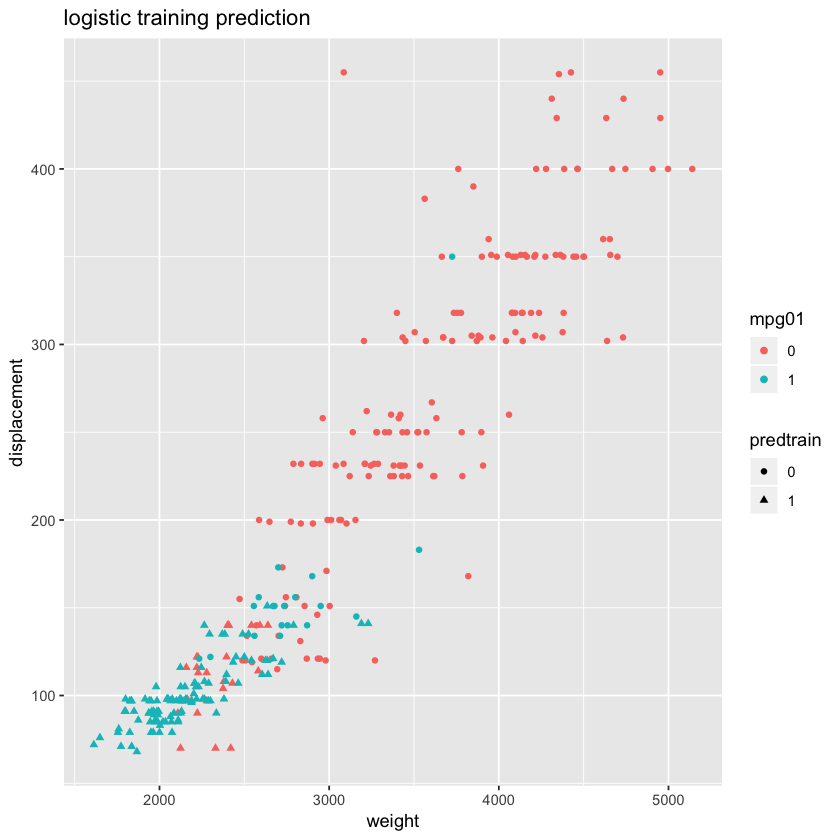

In [19]:
test$predtest = as.factor(testpred)
train$predtrain = as.factor(trainpred)
ggplot(train, 
       aes(x=weight, y=displacement, color = mpg01, shape = predtrain)) +
  geom_point(size=1.5) + ggtitle("logistic training prediction")

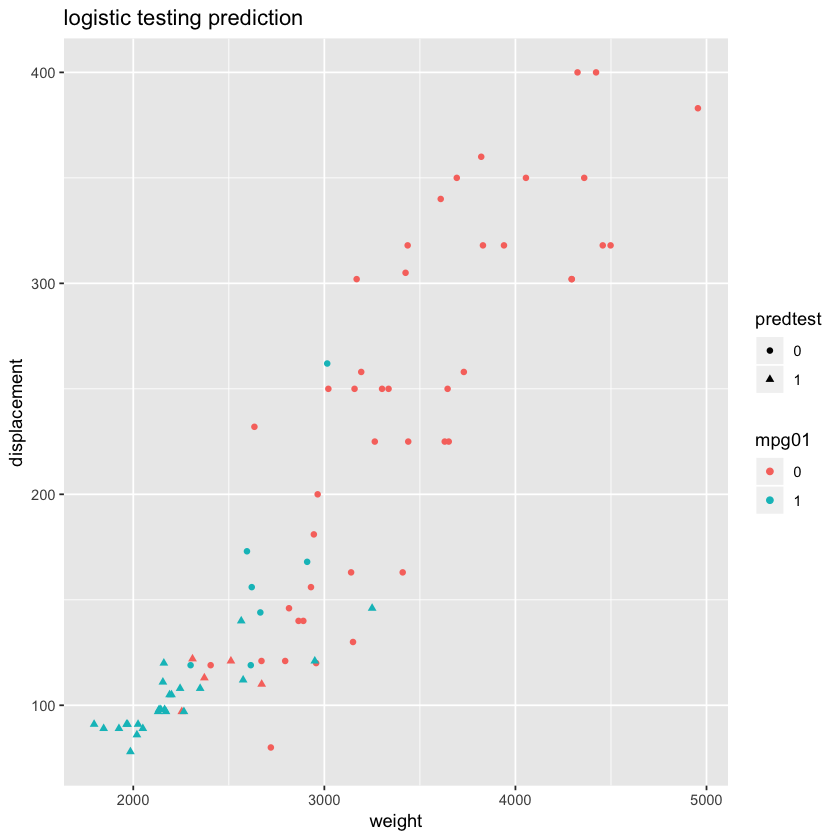

In [20]:
ggplot(test, 
       aes(x=weight, y=displacement, color = mpg01, shape = predtest)) +
  geom_point(size=1.5) + ggtitle("logistic testing prediction")

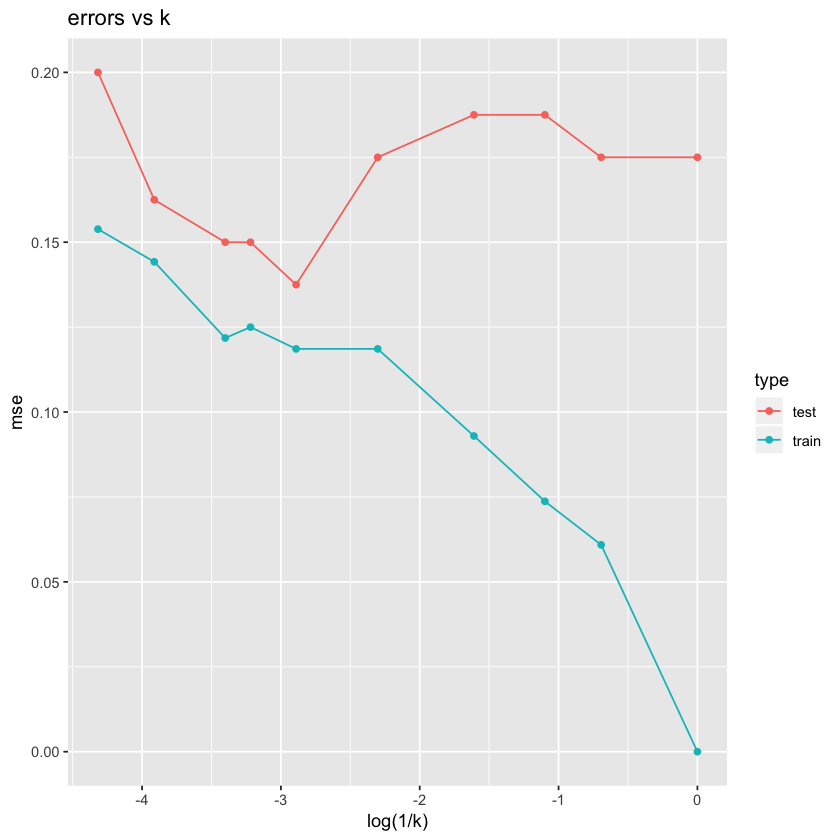

In [23]:
# use KNN do the prediction

# construct knn matrix
Xtrain <- cbind(train$cylinders, train$displacement, train$horsepower, train$weight)
xmeans <- colMeans(Xtrain)
xsd <- sqrt(diag(var(Xtrain)))
Xtrain <- scale(Xtrain, center=xmeans, scale=xsd)

Xtest <- scale(cbind(test$cylinders, test$displacement, test$horsepower, test$weight),
                center=xmeans, scale=xsd)

# do the knn with different Ks
k_range <- c(1, 2, 3, 5, 10, 18, 25, 30, 50, 75)
train_mse_byK <- vector('numeric', length(k_range))
test_mse_byK <- vector('numeric', length(k_range))
for(i in 1:length(k_range)) {
  knnTrain <- knn(train = Xtrain, 
                      test = Xtrain,
                      cl = train$mpg01, 
                      k = k_range[i])
  knnTest <- knn(train = Xtrain,
                     test = Xtest,
                     cl = train$mpg01,
                     k = k_range[i])
  
  train_mse_byK[i] <- mean(train$mpg01 != knnTrain)
  test_mse_byK[i] <- mean(test$mpg01 != knnTest)
}
ggplot(
  data.frame(k = rep(k_range, 2),
             mse = c(train_mse_byK, test_mse_byK),
             type = rep(c('train','test'), each=length(k_range))),
  aes(x=log(1/k), y=mse, color=type)
) +
  geom_line() + geom_point() + ggtitle("errors vs k")

k=1 performance the best on the training set; k=18 performance the best on the testing set. We need to choose k with the smallest testing set, so we choose k=18 as the best k.

[1] 0.1185897

[1] 0.1375

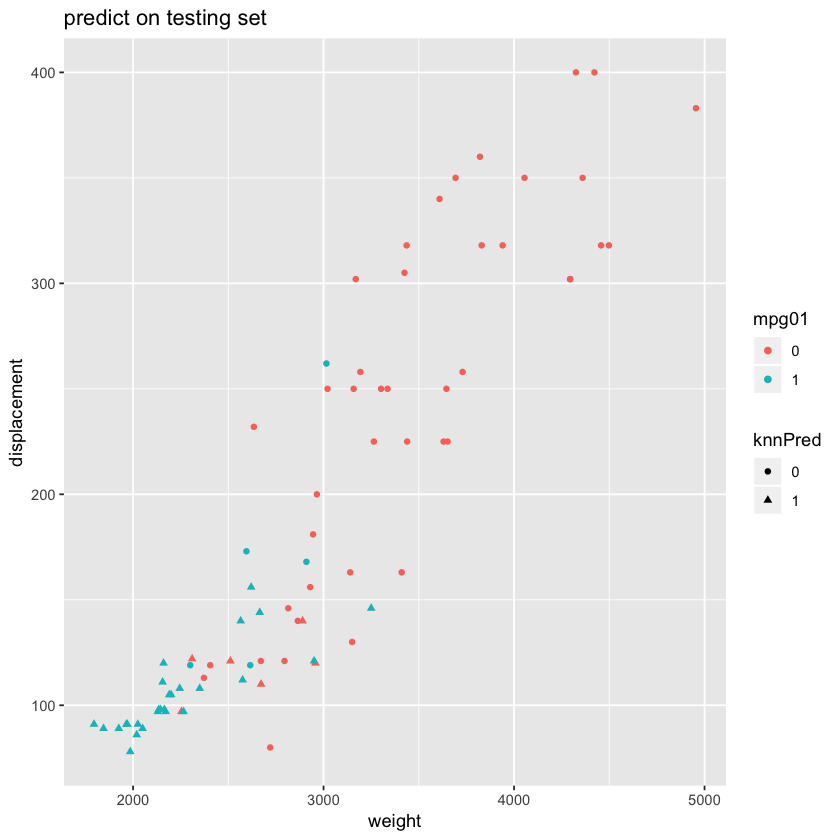

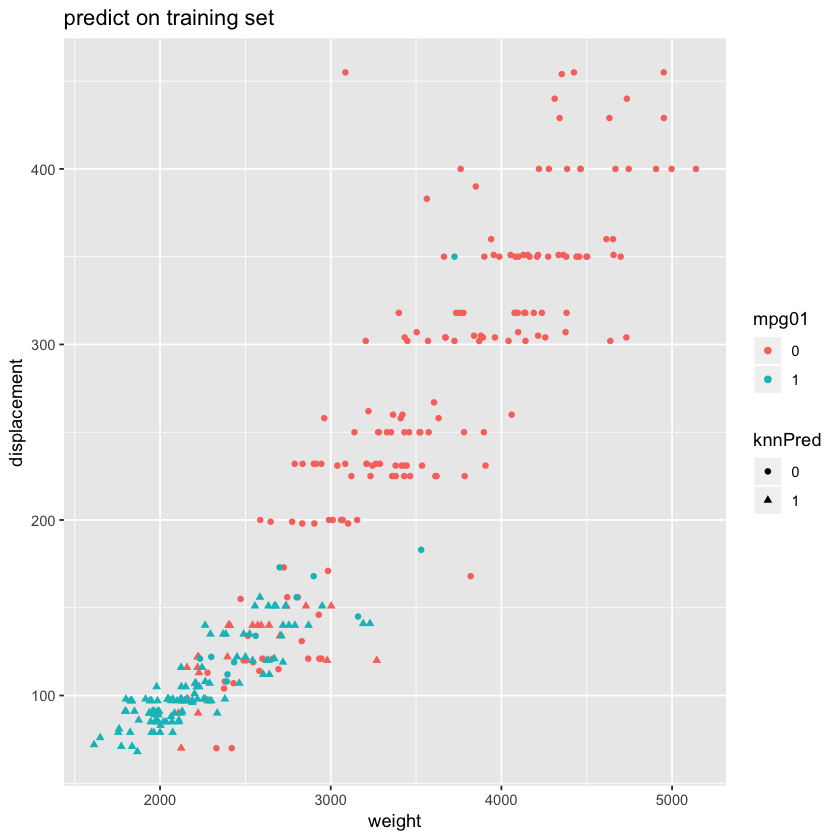

In [24]:
knnTrain18 <- knn(train = Xtrain, 
                      test = Xtrain,
                      cl = train$mpg01, 
                      k = 18)
  knnTest18 <- knn(train = Xtrain,
                     test = Xtest,
                     cl = train$mpg01,
                     k = 18)
train_error = mean(train$mpg01 != knnTrain18)
test_error = mean(test$mpg01 != knnTest18)
train_error
test_error
test$knnPred = as.factor(knnTest18)
train$knnPred = as.factor(knnTrain18)
ggplot(test, 
       aes(x=weight, y=displacement, color = mpg01, shape = knnPred)) +
  geom_point(size=1.5) + ggtitle("predict on testing set")
ggplot(train, aes(x = weight, y = displacement, color = mpg01, shape = knnPred)) + 
geom_point(size = 1.5) + ggtitle("predict on training set")

We could conclude that QDA’s and LDA’s training and testing errors are close to each other, which means their performances are almost equal. So we would like to say the calss-specific coveriances are somewhat similiar with each other. From four models we used, knn has the smallest testing error, then logistic model, then QDA and LDA. However, the differences may be not significent large. We may conclude that the boundary is complicated, but like linear somewhat. The distribution of the data is not standared normal distribution.